<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

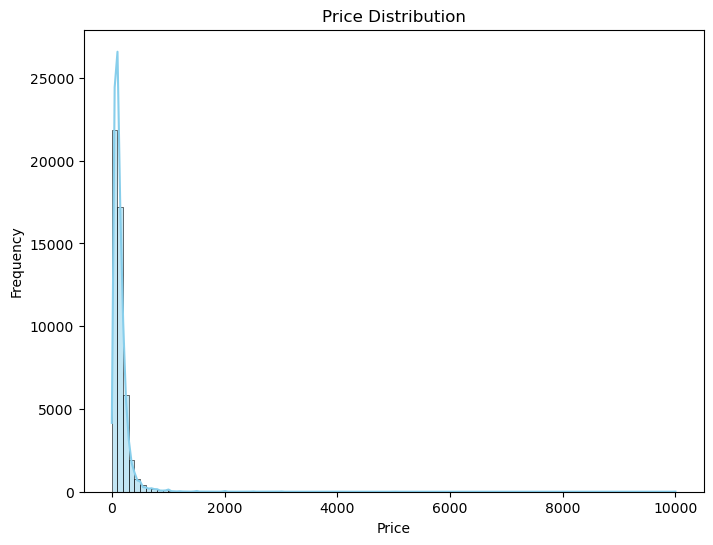

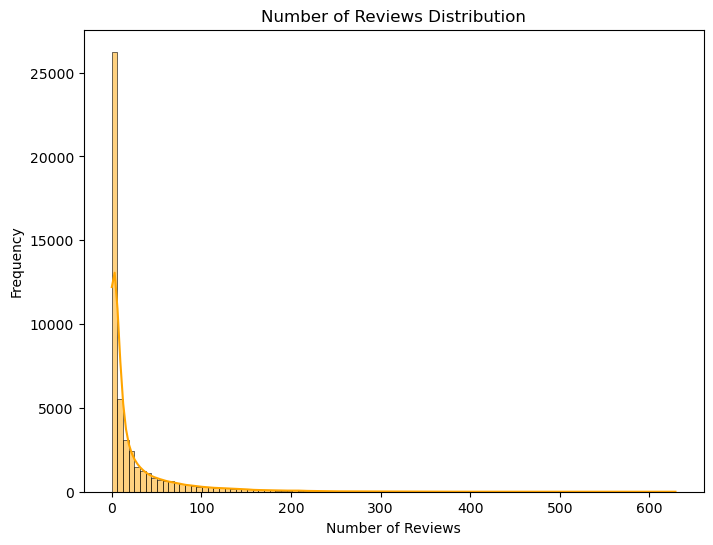

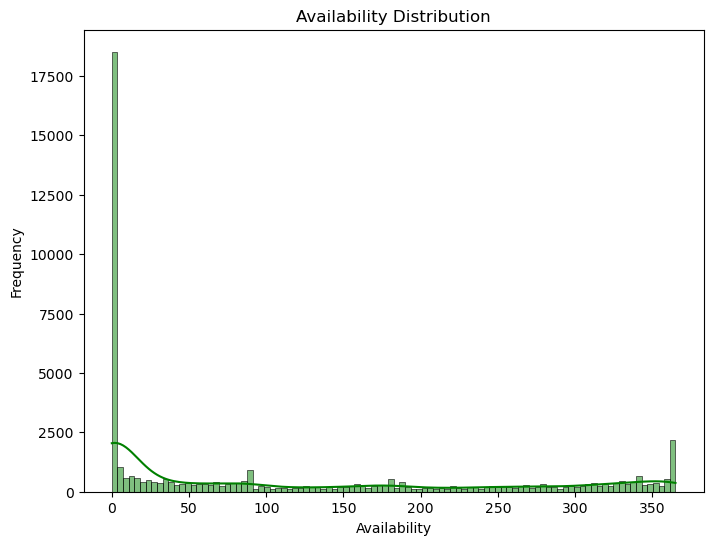

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('AB_NYC_2019.csv')
df.info()

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_columns)

print("\nNumerical Columns:", numerical_columns)

# Plot Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=100, kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Plot Number of Reviews Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['number_of_reviews'], bins=100, kde=True, color='orange')
plt.title("Number of Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

# Plot Availability Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['availability_365'], bins=100, kde=True, color='green')
plt.title("Availability Distribution")
plt.xlabel("Availability")
plt.ylabel("Frequency")
plt.show()



In [145]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Impute or drop missing values
df= df.dropna(subset=['name', 'host_name'])
# 'reviews_per_month' -> Impute with median
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].median())
# Since, missing values in last_review column indicate that no reviews have occurred, we will leave the missing values in this column as it is.
# Duplicated Rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df.drop_duplicates()

Missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Number of duplicate rows: 0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.72,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.72,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.72,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.72,6,2



Neighborhood Distribution:
neighbourhood_group
Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: count, dtype: int64

Room Type Distribution:
room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

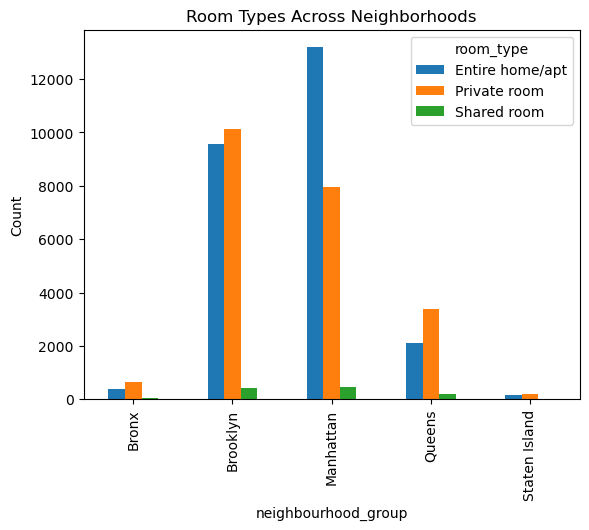

In [148]:
# Categorical Data Processing
print("\nNeighborhood Distribution:")
print(df['neighbourhood_group'].value_counts())

print("\nRoom Type Distribution:")
print(df['room_type'].value_counts())

# Encode categorical variables
encoded_data = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Visualize room types across neighborhoods
plt.figure(figsize=(10, 6))
df.groupby(['neighbourhood_group', 'room_type']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Room Types Across Neighborhoods')
plt.ylabel('Count')
plt.show()

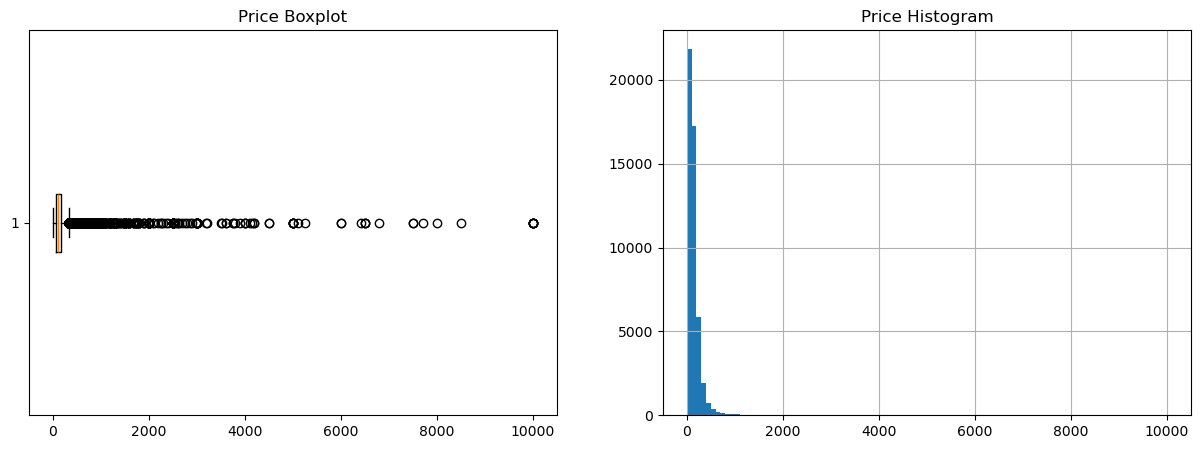

In [150]:
# Outlier Detection and Handling
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['price'], vert=False)
plt.title('Price Boxplot')

plt.subplot(1, 2, 2)
df['price'].hist(bins=100)
plt.title('Price Histogram')
plt.show()

# IQR Method for Outlier Detection
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]
daf = df[~outlier_condition]

Outlier Handling Strategies:
Percentile Method: Remove or cap data points outside certain percentiles (e.g., 1st and 99th).
Z-Score Method: Remove data points with z-scores greater than 3 or less than -3.
IQR Method: Remove values outside 𝑄1−1.5×IQR and 𝑄3+1.5×IQR.
Capping/Winsorization: Replace extreme values with the nearest percentile value (e.g., 1st or 99th percentile).
Log Transformation: Apply log transformation to reduce the impact of extreme values and stabilize variance.

Impact on Visualizations:
Box Plots: Removing outliers makes the box narrower, highlighting the central data.
Histograms: Outlier removal or transformation makes distributions more representative.
Scatter Plots: Reduces distortion from extreme values and improves axis scaling.
Models: Outlier handling improves model robustness and accuracy by removing or mitigating the impact of extreme values.

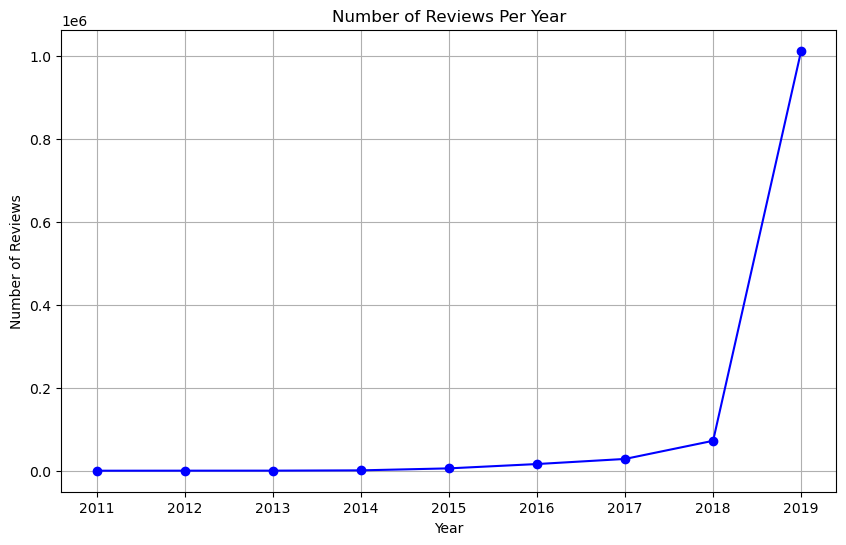

In [153]:
date_col= pd.DatetimeIndex(df['last_review'])
df['Year']= date_col.year
df['Month']= date_col.month
df

# Aggregate the number of reviews by year
reviews_per_year = df.groupby('Year')['number_of_reviews'].sum()

# Plot the trend of reviews per year
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

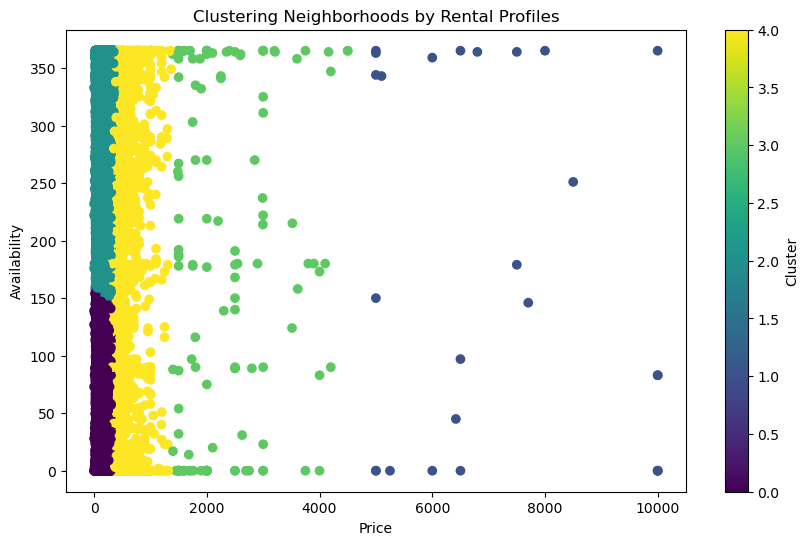

In [155]:
# Advanced Analysis
# Clustering neighborhoods by rental profiles
from sklearn.cluster import KMeans

features = df[['price', 'availability_365']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['availability_365'], c=df['cluster'], cmap='viridis')
plt.title('Clustering Neighborhoods by Rental Profiles')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.colorbar(label='Cluster')
plt.show()
